# UTP PPM 2024

---



# Naive Bayes Classifier

Tuliskan Nama, NIM, dan kelas Anda:

Nama :Salma Adzra Fathina

NIM :225150207111042

Kelas :PPM - F

# Data Loading dan Data Inspection

## Data Loading

In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
# Baca data menggunakan Pandas

import pandas as pd

df = pd.read_csv('Salma Adzra Fathina - churn_cleaned.csv')

## Data Inspection

In [ ]:
df.iloc[:10, :-10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes


In [ ]:
df.iloc[:10, 10:]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


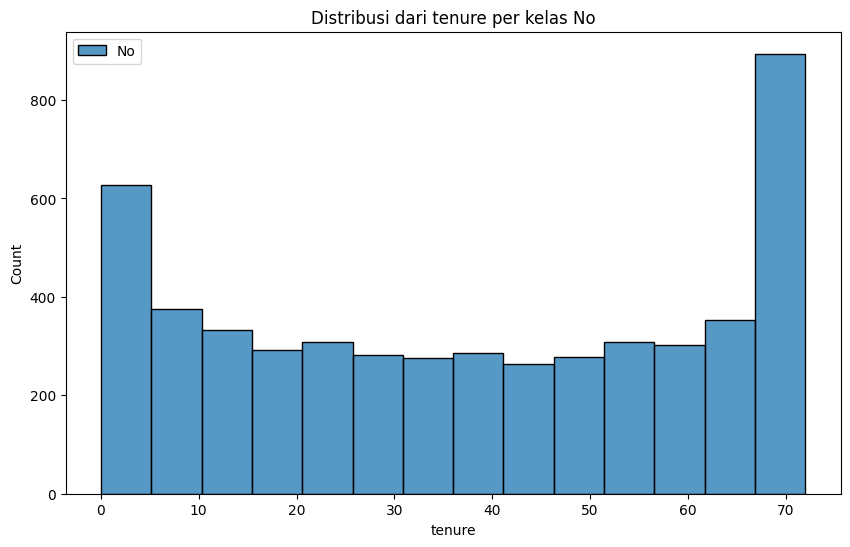

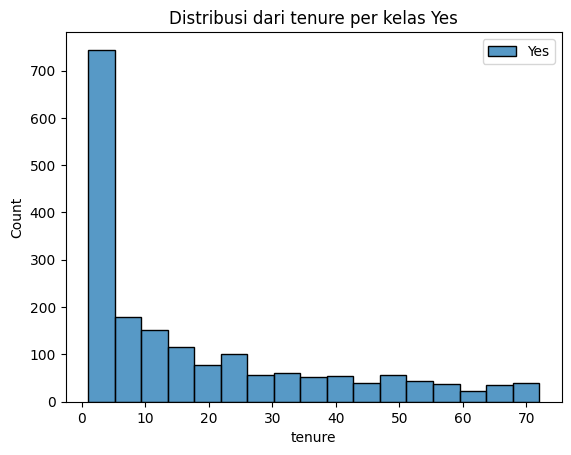

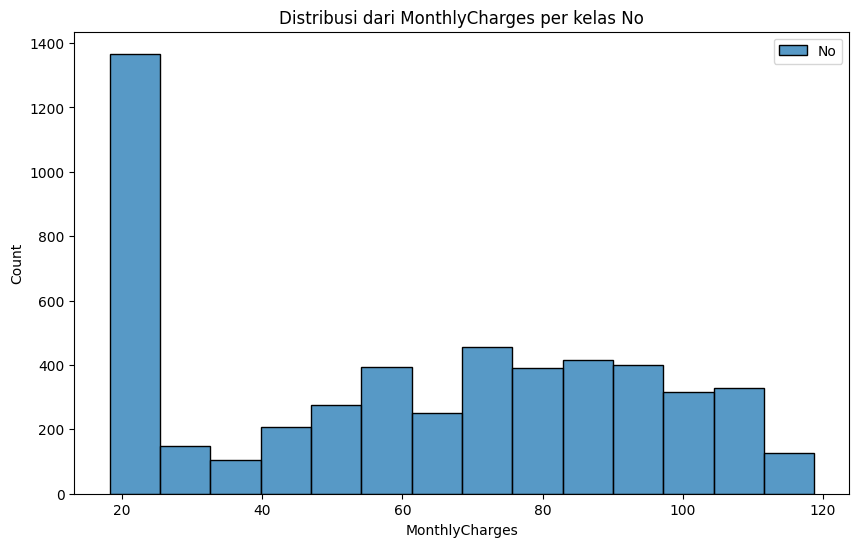

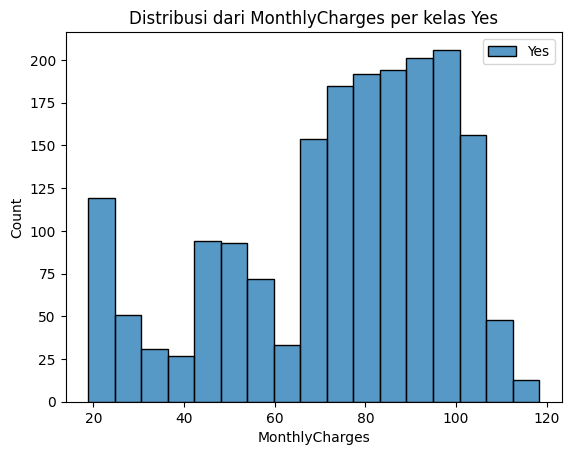

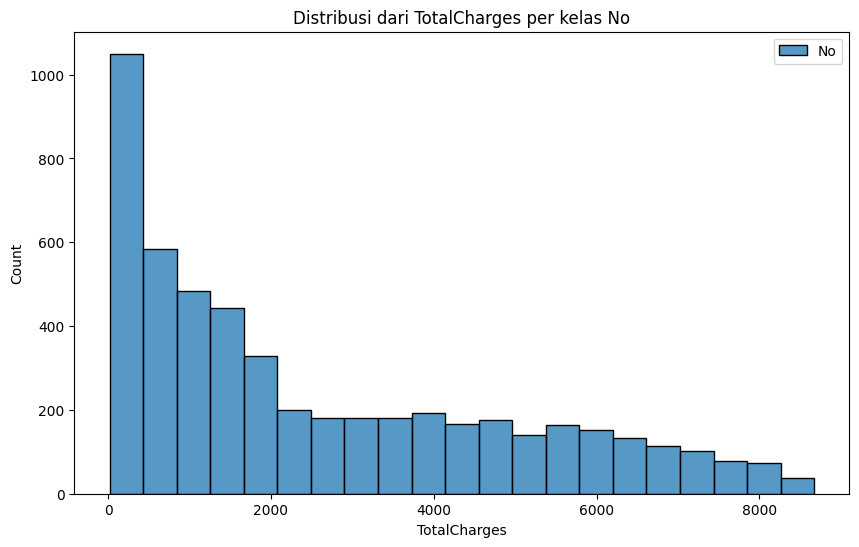

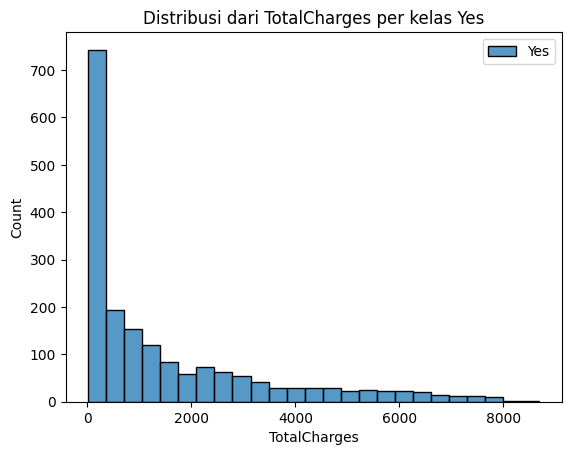

In [ ]:
# Uji normalitas data kontinu dengan melakukan plotting setiap kelas yang ada
#data kontinu = tenure dan monthlycharges

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distribusi(dataframe, column_list, class_column):
  for column in column_list:
    plt.figure(figsize=(10,6))
    for kelas in df[class_column].unique():
      sns.histplot(df[df[class_column] == kelas] [column], label = str(kelas), kde=False)
      plt.title(f'Distribusi dari {column} per kelas {kelas}')
      plt.legend()
      plt.show()

plot_distribusi(df, ['tenure', 'MonthlyCharges', 'TotalCharges'], 'Churn')

<Axes: xlabel='Churn', ylabel='count'>

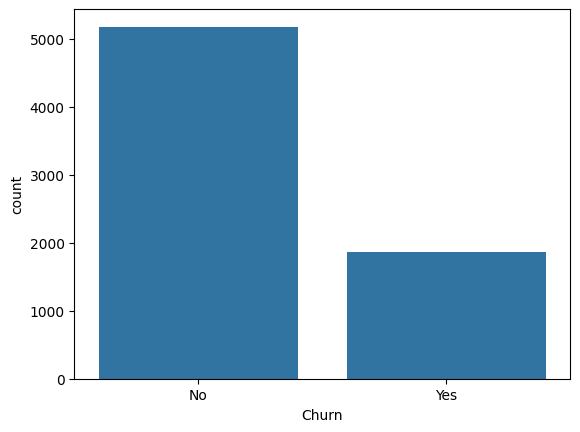

In [ ]:
# Cek distribusi target kelas

sns.countplot(x='Churn', data=df)

**dapat dilihat dari distribusi diatas bahwa terdapat ketidakseimbangan**

# Imbalance Handling

Jika dirasa perlu, lakukan imbalance handling menggunakan metode Oversampling, Undersampling, SMOTE, ataupun metode lainnya untuk meratakan distribusi target kelas



In [ ]:
jumlah_baris, jumlah_kolom = df.shape

print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 7043
Jumlah kolom: 20


In [ ]:
def imp(df):
  list_cols = df.columns
  class_col = list_cols[-1]

  for col in list_cols[:-1]:
    if df[col].isnull().any():
      df[col] = df[col].fillna(df.groupby(class_col)[col].transform('mean'))
  return df

In [ ]:
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


df_imba = df.copy()
undersampling = RandomUnderSampler(random_state = 42)
x_under,y_under = undersampling.fit_resample(df_imba.drop(columns=['Churn']), df_imba['Churn'])

df_undsampling = pd.concat([pd.DataFrame(x_under, columns = df_imba.drop(columns=['Churn']).columns), pd.DataFrame(y_under, columns = ['Churn'])], axis = 1)
df_undsampling = imp(df_undsampling)

<Axes: xlabel='Churn', ylabel='count'>

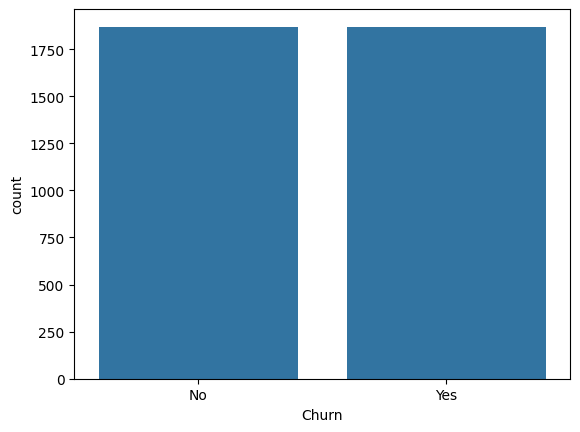

In [ ]:
# Cek distribusi target kelas setelah di imbalance handling dengan undersampling:D

sns.countplot(x='Churn', data=df_undsampling)

In [ ]:
afterSampling = df_undsampling['Churn'].value_counts()
print("After Sampling")
print("Sample Minoritas ", afterSampling.min())
print("Sample Mayoritas ", afterSampling.max())

After Sampling
Sample Minoritas  1869
Sample Mayoritas  1869


# Pemrosesan Awal Data Kontinu

## Standard Scaling

In [ ]:
def standarisasi(df):
  data_tostd = ['tenure', 'MonthlyCharges', 'TotalCharges']

  std_df = df.copy()
  for col in data_tostd:
    std_df[col] = (df[col] - df[col].mean()) / df[col].std()
  return df

std_df = standarisasi(df)
std_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Normalization

In [ ]:
def normalisasi(df):
  data_tonorm = ['tenure', 'MonthlyCharges', 'TotalCharges']

  norm_df = df.copy()
  for col in data_tonorm:
    max = df[col].max()
    min = df[col].min()
    df[col] = (df[col] - min)/(max-min)
  return df

norm_df = normalisasi(df)
norm_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


# Modeling

Pemodelan dilakukan dengan penggabungan konsep Gaussian Naive Bayes dengan Multinomial Naive Bayes. Tidak diperbolehkan untuk melakukan rekayasa fitur dengan binning.

## Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

data_latih, data_uji = train_test_split(df, test_size=0.3, random_state=101)

norm_data_latih, norm_data_uji = data_latih.copy(), data_uji.copy()
norm_label_uji = norm_data_uji.pop('Churn')

std_data_latih, std_data_uji = data_latih.copy(), data_uji.copy()
std_label_uji = std_data_uji.pop('Churn')

## Perhitungan Prior

In [ ]:
from collections import Counter

def hitung_prior(list_kelas):
  n = len(list_kelas)
  prior = Counter(list_kelas)
  for k in prior.keys():
    prior[k] = prior[k] / n
  return prior

**ngetes aja**

In [ ]:
prior_class = hitung_prior(data_latih['Churn'])
print(prior_class)

Counter({'No': 0.7359026369168357, 'Yes': 0.2640973630831643})


## Menghitungan likelihood gaussian dan multinomial

In [ ]:
kontinu = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
def hitung_mean_std_kelas(data):
  list_cols = data[kontinu]
  class_col = data.columns[-1]
  list_class = set(data[class_col])
  rata = {}
  std = {}
  for column in list_cols:
    for a_class in list_class:
      rata[(a_class, column)]= data.loc[data[class_col] == a_class][column].mean()
      std[(a_class, column)] = data.loc[data[class_col] == a_class][column].std()
  return(rata, std)

import math
def likelihood_gaussian(data,rata,std):
  hasil = (1/math.sqrt(2*math.pi*(std**2)))*math.exp((-1*((data-rata)**2))/(2*(std**2)))
  return hasil

def likelihood_multinomial(data):
  list_cols = data.loc[:, data.columns !='kontinu']
  class_col = data_latih.columns[-1]
  list_class = set(data_latih[class_col])
  likelihood = {}
  hasil = {}
  for column in list_cols:
      likelihood[column] = {}
      for column_value in data_latih[column].unique():
          likelihood[column][column_value] = {}
          for a_class in list_class:
              count_wc = len(data_latih[(data_latih[column] == column_value) & (data_latih[class_col] == a_class)])
              count_c = len(data_latih[data_latih[class_col] == a_class])
              v = len(data_latih[column].unique())
              likelihood[column][column_value][a_class] = (count_wc + 1) / (count_c + v)
              hasil[(column, column_value, a_class)] = likelihood[column][column_value][a_class]
  return hasil

## Training Naive Bayes

In [ ]:
def training_naive_bayes(data_latih):
  class_colu = data_latih.columns[-1]
  prior = hitung_prior(data_latih[class_colu])
  (rata, std) = hitung_mean_std_kelas(data_latih)
  likelihood = likelihood_multinomial(data_latih)
  list_class = set(data_latih[class_colu])
  list_cols = data_latih.columns[:-1]
  model = {}
  model['prior'] = prior
  model['rata'] = rata
  model['std'] = std
  model['likelihood_multinomial'] = likelihood
  model['list_class'] = list_class
  model['list_cols'] = list_cols
  return model

**buat ngetes**

In [ ]:
model_std = training_naive_bayes(std_data_latih)
print(model_std)

{'prior': Counter({'No': 0.7359026369168357, 'Yes': 0.2640973630831643}), 'rata': {('Yes', 'tenure'): 0.2457757296466974, ('No', 'tenure'): 0.5197882212421904, ('Yes', 'MonthlyCharges'): 0.5585689066189788, ('No', 'MonthlyCharges'): 0.42836218576357465, ('Yes', 'TotalCharges'): 0.17084550637181237, ('No', 'TotalCharges'): 0.2910356235875138}, 'std': {('Yes', 'tenure'): 0.2678491746140074, ('No', 'tenure'): 0.3345806658896844, ('Yes', 'MonthlyCharges'): 0.24437772136964422, ('No', 'MonthlyCharges'): 0.3079751812954263, ('Yes', 'TotalCharges'): 0.21458338781587924, ('No', 'TotalCharges'): 0.26740426206486495}, 'likelihood_multinomial': {('gender', 'Male', 'Yes'): 0.5122699386503068, ('gender', 'Male', 'No'): 0.5101928374655648, ('gender', 'Female', 'Yes'): 0.48773006134969327, ('gender', 'Female', 'No'): 0.48980716253443524, ('SeniorCitizen', 0, 'Yes'): 0.7530674846625767, ('SeniorCitizen', 0, 'No'): 0.8707988980716254, ('SeniorCitizen', 1, 'Yes'): 0.2469325153374233, ('SeniorCitizen', 1

## Testing Naive Bayes

In [ ]:
def testing_naive_bayes(model, data_uji):
  prior = model['prior']
  rata = model['rata']
  std = model['std']
  list_class = model['list_class']
  list_cols = model['list_cols']
  likelihood = model['likelihood_multinomial']
  posterior = dict.fromkeys(list_class, 1)
  for cls in list_class:
    for col in list_cols:
      if (col in kontinu):
        posterior[cls] *= likelihood_gaussian(data_uji[col], rata [(cls, col)], std[(cls, col)])
      else:
        col_value = data_uji[col]
        posterior[cls] *= likelihood[(col, col_value, cls)]
    posterior[cls] *= prior[cls]
  kelas_uji = max(posterior, key = posterior.get)
  return kelas_uji

# Analisis Klasifikasi

## Dataset Standarisasi

### Training Naive Bayes

In [ ]:
model_std = training_naive_bayes(std_data_latih)
print(model_std)

{'prior': Counter({'No': 0.7359026369168357, 'Yes': 0.2640973630831643}), 'rata': {('Yes', 'tenure'): 0.2457757296466974, ('No', 'tenure'): 0.5197882212421904, ('Yes', 'MonthlyCharges'): 0.5585689066189788, ('No', 'MonthlyCharges'): 0.42836218576357465, ('Yes', 'TotalCharges'): 0.17084550637181237, ('No', 'TotalCharges'): 0.2910356235875138}, 'std': {('Yes', 'tenure'): 0.2678491746140074, ('No', 'tenure'): 0.3345806658896844, ('Yes', 'MonthlyCharges'): 0.24437772136964422, ('No', 'MonthlyCharges'): 0.3079751812954263, ('Yes', 'TotalCharges'): 0.21458338781587924, ('No', 'TotalCharges'): 0.26740426206486495}, 'likelihood_multinomial': {('gender', 'Male', 'Yes'): 0.5122699386503068, ('gender', 'Male', 'No'): 0.5101928374655648, ('gender', 'Female', 'Yes'): 0.48773006134969327, ('gender', 'Female', 'No'): 0.48980716253443524, ('SeniorCitizen', 0, 'Yes'): 0.7530674846625767, ('SeniorCitizen', 0, 'No'): 0.8707988980716254, ('SeniorCitizen', 1, 'Yes'): 0.2469325153374233, ('SeniorCitizen', 1

### Evaluasi Prediksi

In [ ]:
prediksi_total_std =[]
for indeks in range(std_data_uji.shape[0]):
  prediksi_total_std.append(testing_naive_bayes(model_std,std_data_uji.iloc[indeks]))
print("Total prediksi benar: ",sum(prediksi_total_std==std_label_uji), "dari" ,len(std_data_uji), "total data uji yang terstandarisasi")

Total prediksi benar:  1548 dari 2113 total data uji yang terstandarisasi


## Dataset Normalisasi

### Training Naive Bayes

In [ ]:
model_norm = training_naive_bayes(norm_data_latih)
print(model_norm)

{'prior': Counter({'No': 0.7359026369168357, 'Yes': 0.2640973630831643}), 'rata': {('Yes', 'tenure'): 0.2457757296466974, ('No', 'tenure'): 0.5197882212421904, ('Yes', 'MonthlyCharges'): 0.5585689066189788, ('No', 'MonthlyCharges'): 0.42836218576357465, ('Yes', 'TotalCharges'): 0.17084550637181237, ('No', 'TotalCharges'): 0.2910356235875138}, 'std': {('Yes', 'tenure'): 0.2678491746140074, ('No', 'tenure'): 0.3345806658896844, ('Yes', 'MonthlyCharges'): 0.24437772136964422, ('No', 'MonthlyCharges'): 0.3079751812954263, ('Yes', 'TotalCharges'): 0.21458338781587924, ('No', 'TotalCharges'): 0.26740426206486495}, 'likelihood_multinomial': {('gender', 'Male', 'Yes'): 0.5122699386503068, ('gender', 'Male', 'No'): 0.5101928374655648, ('gender', 'Female', 'Yes'): 0.48773006134969327, ('gender', 'Female', 'No'): 0.48980716253443524, ('SeniorCitizen', 0, 'Yes'): 0.7530674846625767, ('SeniorCitizen', 0, 'No'): 0.8707988980716254, ('SeniorCitizen', 1, 'Yes'): 0.2469325153374233, ('SeniorCitizen', 1

### Evaluasi Prediksi

In [ ]:
prediksi_total_norm =[]
for indeks in range(norm_data_uji.shape[0]):
  prediksi_total_norm.append(testing_naive_bayes(model_norm, norm_data_uji.iloc[indeks]))
print("Total prediksi benar: ",sum(prediksi_total_norm==norm_label_uji), "dari" ,len(norm_data_uji), "total data uji yang ternormalisasi")

Total prediksi benar:  1548 dari 2113 total data uji yang ternormalisasi


# Kesimpulan

Soal

1. Apakah data kontinu dalam dataset menunjukkan kecenderungan distribusi normal?

2. Jika anda melakukan imbalance handling, mengapa hal tersebut perlu dilakukan?

3. Dalam hasil percobaan diatas, apakah efek dari standarisasi/normalisasi yang dilakukan terhadap data?

4. Dalam kasus yang diberikan, apakah model hybrid multinomial dan gaussian sudah optimal? Pengembangan apa saja yang dapat dilakukan?

Jawaban

1. Tidak, dari 3 data kontinu yang saya temukan (tenure, monthlycharges, dan totalcharges), semua data tersebut terdapat ketidakseimbangan data(skewness). Dimana kelas Churn pada label no terlihat lebih banyak

2. Saya telah melakukan imbalance handling sebelumnya dengan metode undersampling, tetapi hasil dari prediksi malah semakin jelek daripada hasil prediksi tanpa undersampling (mungkin data setelah undersampling perlu saya acak lagi atau entah bagaimana, waktunya tidak cukup huhu terpotong perjalanan mudiks)

3. untuk standarisasi itu sendiri mengubah nilai dari fitur2 agar nilai tersebut memiliki skala yang sama, sedangkan untuk normalisasi juga sama, tetapi bedanya standarisasi mengubah nilainya agar memiliki rata2 0 dengan std 1 dan normalisasi mengubah rentangnya menjadi antara 0-1

4.  model hybrid gaussian multinominal saya rasa masih kurang optimal, karena model ini awalnya memisahkan data kontinu dan diskrit untuk fungsi likelihood yang kemudian nantinya digabung lagi sehingga kinerja model akan menjadi kurang efisien.